<a href="https://colab.research.google.com/github/hufsaim/T10203101/blob/master/notebook/ch22_01_steepest_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Method of steepest descent in Example 1
- Steepest descent method를 이용하여 두 개의 변수 x1, x2를 가지는 함수 f(x1,x2)로부터 gradient를 계산하여 f(x1, x2)를 최소로 만드는 x1, x2를 찾는 실습을 진행해봅니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm


- 두 개의 변수가 정의되는 구간을 먼저 정의합니다.

In [2]:
delta = 0.01
x1 = np.arange(-7.0,7,delta)
x2 = np.arange(-7.0,7,delta)
X1, X2 = np.meshgrid(x1,x2)

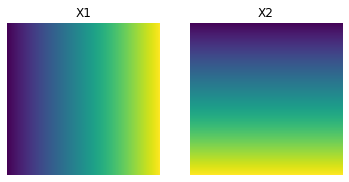

In [3]:
plt.subplot(121)
plt.imshow(X1)
plt.axis('off')
plt.title('X1')
plt.subplot(122)
plt.imshow(X2)
plt.axis('off')
plt.title('X2')
plt.show()

- 2개의 변수 x1, x2를 가지는 함수 F를 정의합니다.

In [4]:
F = X1**2 + 3*(X2**2)

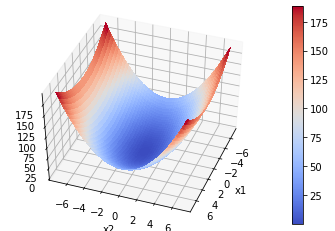

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.azim = 20
ax.dist = 10
ax.elev = 45
surf = ax.plot_surface(X1,X2,F, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

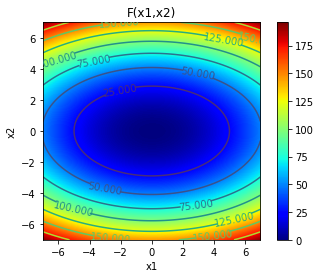

In [6]:
CS = plt.contour(X1, X2, F,8)
plt.clabel(CS, inline=1, fontsize=10)
plt.imshow(F,extent=[X1.min(),X1.max(),X2.min(),X2.max()],cmap='jet')
plt.title('F(x1,x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

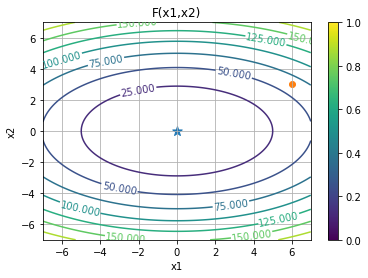

In [7]:
CS = plt.contour(X1, X2, F,8)
plt.clabel(CS, inline=1, fontsize=10)
plt.grid('on')
plt.scatter(0,0,marker='*',s=100)
plt.scatter(6,3,marker='o')
plt.title('F(x1,x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

- objective function f와 f의 gradient, t를 각각 정의합니다.

In [8]:
def f(x):
  return np.array(x[0]**2 + 3*(x[1]**2))

def f_grad(x):
  return np.array([2*x[0], 6*x[1]])

def t(x):
  return np.array((x[0]**2 + 9*(x[1]**2))/(2*(x[0]**2)+54*(x[1]**2)))

- iteration 종료를 위한 조건(max_N, eps)를 설정하여 steepest descent를 이용하여 objective function f의 최소값에 가까운 값을 출력할 수 있는 x1, x2를 찾도록 합니다.

n= 0, f=63.00, x1=6.000, x2=3.000
n= 1, f=13.94, x1=3.484, x2=-0.774
n= 2, f=3.08, x1=1.327, x2=0.664
n= 3, f=0.68, x1=0.771, x2=-0.171
n= 4, f=0.15, x1=0.294, x2=0.147
n= 5, f=0.03, x1=0.170, x2=-0.038
n= 6, f=0.01, x1=0.065, x2=0.032
k


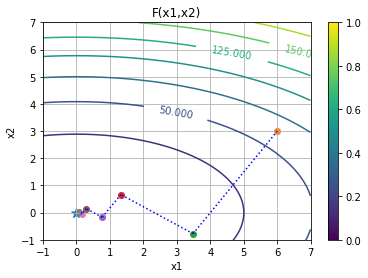

In [9]:
max_N = 100
eps = 0.01
tab='\t'
x = np.array([6., 3.])
fvals = np.array([])
fvals = np.append(fvals,f(x))
CS = plt.contour(X1, X2, F,8)
plt.clabel(CS, inline=1, fontsize=10)
plt.grid('on')
plt.scatter(0,0,marker='*',s=100)

for n in range(0,max_N+1):
  plt.scatter(x[0],x[1],marker='o')
  print(f'n={n:2d}, f={f(x):.2f}, x1={x[0]:.3f}, x2={x[1]:.3f}')
  x_ = x - t(x)*f_grad(x)
  fvals_ = f(x_)
  if np.abs(fvals[-1] - fvals_)<eps:
    print('k')
    break
  plt.plot([x[0],x_[0]],[x[1],x_[1]],':',c='b')
  x = x_
  fvals = np.append(fvals,f(x))
  
plt.title('F(x1,x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.axis([-1,7,-1,7])
plt.show()


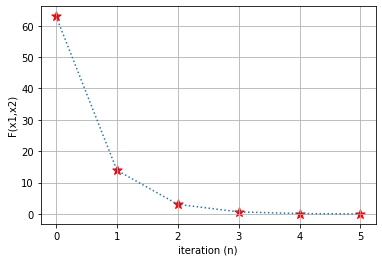

In [10]:
plt.plot(range(0,n),fvals[:-1],':')
plt.scatter(range(0,n),fvals[:-1],marker='*',c='r',s=98)
plt.xlabel('iteration (n)')
plt.ylabel('F(x1,x2)')
plt.grid('on')
plt.show()